# Features and prediction

**Realizar una exploración visual.** 
<br/>

* ¿Es relevante el género para el abandono? (es decir, ¿hay más
probabilidades de que abandone siendo de algún género en particular?). 
* ¿Si es un senior citizen? 
* ¿El método de pago?

<hr/>

In [1]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.close("all")

import seaborn as sns

In [2]:
df_churn = pd.read_csv('../data/preprocessed/churn_preprocessed.csv')

In [3]:
df_churn.sample(5)

,Unnamed: 0.1,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1081,2085,2085,8290-YWKHZ,Female,1,Yes,No,32.0,Yes,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.20,2931.00,Yes
5960,6971,6971,7240-FQLHE,Female,1,Yes,No,18.0,Yes,Yes,...,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),99.75,1836.25,Yes
4451,5460,5460,6551-VLJMV,Male,0,Yes,No,34.0,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.05,679.00,No
3095,4101,4101,9780-FKVVF,Male,0,No,No,6.0,Yes,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.15,336.70,No
5265,6274,6274,4685-ERGHK,Male,0,No,No,57.0,Yes,Yes,...,No,No,Yes,No,One year,Yes,Electronic check,86.90,4939.25,No


<hr/>

In [4]:
gender = pd.DataFrame(df_churn.groupby(['gender', 'Churn'])['Churn'].agg(['count'])).reset_index()
SeniorCitizen = pd.DataFrame(df_churn.groupby(['SeniorCitizen','Churn'])['Churn'].agg(['count'])).reset_index()
PaymentMethod = pd.DataFrame(df_churn.groupby(['PaymentMethod','Churn'])['Churn'].agg(['count'])).reset_index()

### Gender insight

 ¿Es relevante el género para el abandono?
 <br/>
 
 Plot analysis 

In [5]:
gender = gender.rename(columns={'Churn':'churn','count': 'amount'})
gender

,gender,churn,amount
0,Female,No,2200
1,Female,Yes,800
2,Male,No,2234
3,Male,Yes,798


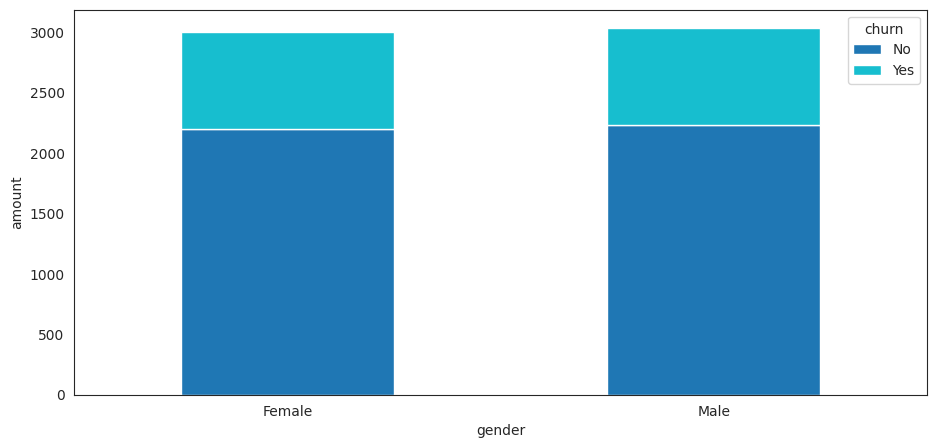

In [6]:
sns.set_style('white')
(gender
    .groupby(['gender', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');

### SeniorCitizen insight

Plot analysis shows that [SeniorCitizen = 1] has similar proportions between Churn (yes/no), It means that being a SeniorCitizen doesn't relate to an specific Churn condition.
<br/>

**In the opposite, [SeriorCitizen = 0] gives us more chances of having [Churn = No].**

In [7]:
SeniorCitizen = SeniorCitizen.rename(columns={'Churn':'churn','count': 'amount'})
SeniorCitizen

,SeniorCitizen,churn,amount
0,0,No,3861
1,0,Yes,1180
2,1,No,573
3,1,Yes,418


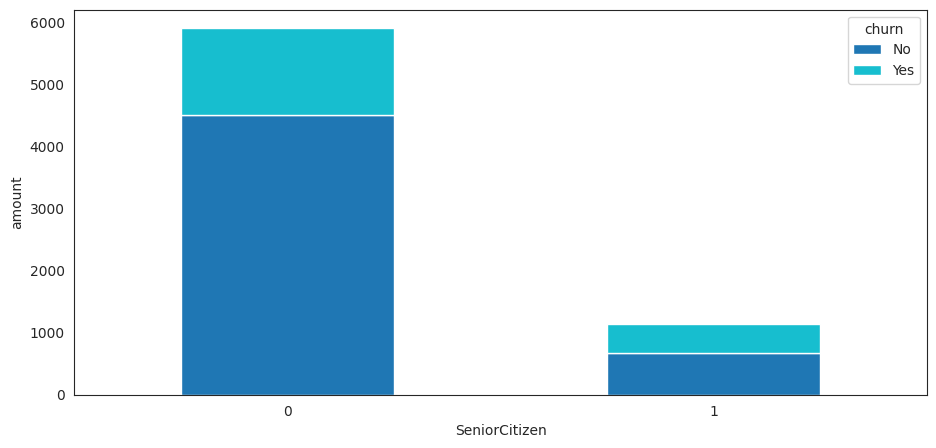

In [215]:
sns.set_style('white')
(SeniorCitizen
    .groupby(['SeniorCitizen', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');

### PaymentMethod insight

There is more [Churn = Yes] probability if the client has **Electronic check** as payment method.

In [8]:
PaymentMethod = PaymentMethod.rename(columns={'Churn':'churn','count': 'amount'})
PaymentMethod

,PaymentMethod,churn,amount
0,Bank transfer (automatic),No,1092
1,Bank transfer (automatic),Yes,212
2,Credit card (automatic),No,1114
3,Credit card (automatic),Yes,199
4,Electronic check,No,1103
5,Electronic check,Yes,913
6,Mailed check,No,1125
7,Mailed check,Yes,274


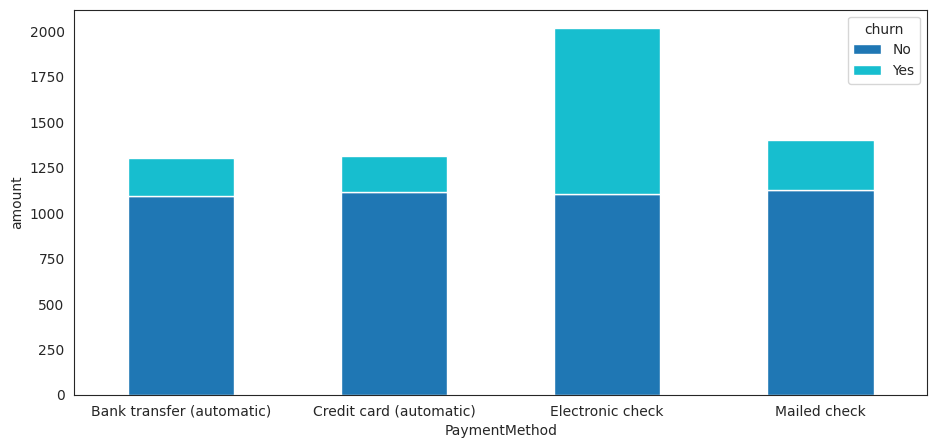

In [9]:
sns.set_style('white')
(PaymentMethod
    .groupby(['PaymentMethod', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');